In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('../Datasets/titanic/train.csv')

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset = dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [6]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [8]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [9]:
dataset['Cabin'] = pd.factorize(dataset.Cabin)[0]

In [10]:
dataset.fillna(0,inplace = True)

In [11]:
dataset['Sex'] = [1 if x=='male' else 0 for x in dataset.Sex]

In [12]:
dataset['p1'] = np.array(dataset['Pclass'] == 1).astype(np.int32)
dataset['p2'] = np.array(dataset['Pclass'] == 2).astype(np.int32)
dataset['p3'] = np.array(dataset['Pclass'] == 3).astype(np.int32)

In [13]:
del dataset['Pclass']

In [14]:
dataset.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [15]:
dataset['e1'] = np.array(dataset['Embarked'] == 'S').astype(np.int32)
dataset['e2'] = np.array(dataset['Embarked'] == 'C').astype(np.int32)
dataset['e3'] = np.array(dataset['Embarked'] == 'Q').astype(np.int32)

In [16]:
del dataset['Embarked']

In [20]:
dataset.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'p1', 'p2',
       'p3', 'e1', 'e2', 'e3'],
      dtype='object')

In [24]:
data_train = dataset[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'p1', 'p2','p3', 'e1', 'e2', 'e3']]

In [25]:
data_target = dataset['Survived'].values.reshape(len(dataset),1)

In [26]:
np.shape(data_train), np.shape(data_target)

((891, 12), (891, 1))

In [29]:
import tensorflow as tf

In [30]:
x = tf.placeholder("float", shape = [None,12])
y = tf.placeholder("float", shape = [None,1])

In [46]:
weight = tf.Variable(tf.random_normal([12,1]))
bias = tf.Variable(tf.random_normal([1]))
output = tf.matmul(x,weight) + bias
pred = tf.cast(tf.sigmoid(output)>0.5, tf.float32)


In [47]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = output))

In [48]:
train_step = tf.train.GradientDescentOptimizer(0.0003).minimize(loss)

In [49]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,y), tf.float32))

In [50]:
data_test = pd.read_csv('../Datasets/titanic/test.csv')
data_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())
data_test['Cabin'] = pd.factorize(data_test.Cabin)[0]
data_test.fillna(0,inplace = True)
data_test['Sex'] = [1 if x=='male' else 0 for x in data_test.Sex]
data_test['p1'] = np.array(data_test['Pclass'] == 1).astype(np.int32)
data_test['p2'] = np.array(data_test['Pclass'] == 2).astype(np.int32)
data_test['p3'] = np.array(data_test['Pclass'] == 3).astype(np.int32)
data_test['e1'] = np.array(data_test['Embarked'] == 'S').astype(np.int32)
data_test['e2'] = np.array(data_test['Embarked'] == 'C').astype(np.int32)
data_test['e3'] = np.array(data_test['Embarked'] == 'Q').astype(np.int32)
del data_test['Pclass']
del data_test['Embarked']

In [51]:
data_test

,Sex,Age,SibSp,Parch,Fare,Cabin,p1,p2,p3,e1,e2,e3
0,1,34.50000,0,0,7.8292,-1,0,0,1,0,0,1
1,0,47.00000,1,0,7.0000,-1,0,0,1,1,0,0
2,1,62.00000,0,0,9.6875,-1,0,1,0,0,0,1
3,1,27.00000,0,0,8.6625,-1,0,0,1,1,0,0
4,0,22.00000,1,1,12.2875,-1,0,0,1,1,0,0
5,1,14.00000,0,0,9.2250,-1,0,0,1,1,0,0
6,0,30.00000,0,0,7.6292,-1,0,0,1,0,0,1
7,1,26.00000,1,1,29.0000,-1,0,1,0,1,0,0
8,0,18.00000,0,0,7.2292,-1,0,0,1,0,1,0
9,1,21.00000,2,0,24.1500,-1,0,0,1,1,0,0


In [52]:
test_label = pd.read_csv('../Datasets/titanic/gender_submission.csv')
test_label = np.reshape(test_label.Survived.values.astype(np.float32),(418,1))


In [54]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss_train = []
train_acc = []
test_acc = []

In [55]:
for i in range(25000):
    index = np.random.permutation(len(data_target))
    data_train = pd.DataFrame(data_train)
    data_train.iloc[index]
    data_target = pd.DataFrame(data_target)
    data_target.iloc[index]
    for n in range(len(data_target)//100 + 1):
        batch_xs = data_train[n*100:n*100+100]
        batch_ys = data_target[n*100:n*100+100]
        sess.run(train_step,feed_dict = {x:batch_xs,y:batch_ys})
    if i%1000 == 0:
        loss_temp = sess.run(loss,feed_dict = {x:batch_xs,y:batch_ys})
        loss_train.append(loss_temp)
        train_acc_temp = sess.run(accuracy,feed_dict = {x:batch_xs,y:batch_ys})
        train_acc.append(train_acc_temp)
        test_acc_temp = sess.run(accuracy,feed_dict = {x:data_test,y:test_label})
        test_acc.append(test_acc_temp)
        print(loss_temp,train_acc_temp,test_acc_temp)

26.317774 0.26373628 0.3660287
0.5271072 0.74725276 0.7416268
0.4973635 0.7582418 0.73444974
0.47965664 0.7582418 0.73923445
0.46732074 0.7692308 0.74880385
0.45810676 0.7692308 0.77272725
0.4509496 0.7802198 0.79425836
0.44523993 0.7912088 0.81578946
0.44059208 0.8021978 0.8492823
0.43674648 0.8021978 0.8636364
0.43352228 0.7912088 0.87081337
0.430789 0.7912088 0.8779904
0.4284496 0.7912088 0.88755983
0.4264311 0.7912088 0.8947368
0.42467764 0.7912088 0.8995215
0.42314583 0.7912088 0.9066986
0.42180067 0.7912088 0.9114832
0.4206141 0.8021978 0.9138756
0.41956326 0.8131868 0.9186603
0.41862944 0.8131868 0.9449761
0.4177968 0.8131868 0.9449761
0.41705197 0.8131868 0.9449761
0.41638553 0.8131868 0.94736844
0.4157857 0.8131868 0.9497608
0.41524544 0.8131868 0.9521531


In [57]:
import matplotlib.pyplot as plt

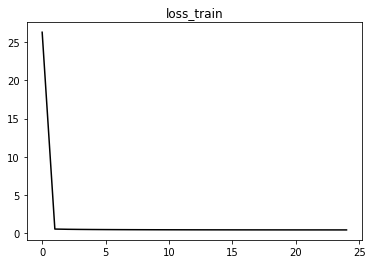

In [59]:
plt.plot(loss_train,'k-')
plt.title('loss_train')
plt.show()

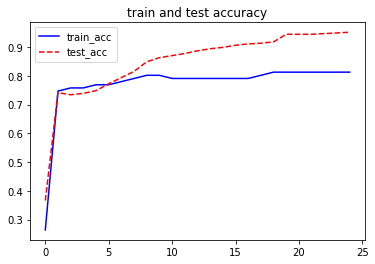

In [60]:
plt.plot(train_acc,'b-',label = 'train_acc')
plt.plot(test_acc,'r--',label = 'test_acc')
plt.title("train and test accuracy")
plt.legend()
plt.show()